<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Catchup_Assignment_for_Midterm_Exam/b)_Crop_Disease_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌾 Crop Disease Detection with Transfer Learning
This notebook performs cassava leaf disease classification using EfficientNetB0 via transfer learning and fine-tuning.

In [1]:
!pip install -q tensorflow tensorflow-datasets matplotlib

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cassava',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True,
    with_info=True
)

class_names = ds_info.features['label'].names
print("Classes:", class_names)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5656 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/incomplete.9B76KA_0.1.0/cassava-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/1885 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/incomplete.9B76KA_0.1.0/cassava-test.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/1889 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/incomplete.9B76KA_0.1.0/cassava-validation.tfrecord*...:   0%|    …

Dataset cassava downloaded and prepared to /root/tensorflow_datasets/cassava/0.1.0. Subsequent calls will reuse this data.
Classes: ['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


In [4]:
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = ds_val.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [5]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

base_model = EfficientNetB0(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 139s 437ms/step - accuracy: 0.7211 - loss: 0.8091 - val_accuracy: 0.3628 - val_loss: 1.5253
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 0.8191 - loss: 0.5097 - val_accuracy: 0.1699 - val_loss: 1.9715
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 40s 142ms/step - accuracy: 0.8865 - loss: 0.3306 - val_accuracy: 0.1947 - val_loss: 1.6371
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 25s 150ms/step - accuracy: 0.9184 - loss: 0.2310 - val_accuracy: 0.4407 - val_loss: 1.5512
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - accuracy: 0.9415 - loss: 0.1707 - val_accuracy: 0.0867 - val_loss: 1.9279
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.9467 - loss: 0.1486 - val_accuracy: 0.4177 - val_loss: 1.5061
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 41s 152ms/step - accuracy: 0.9552 - loss: 0.1327 - val_accuracy: 0.1912 - val_loss: 2.7280
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.9476 - loss: 

In [11]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 138s 443ms/step - accuracy: 0.9777 - loss: 0.0632 - val_accuracy: 0.3150 - val_loss: 2.3022
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.9852 - loss: 0.0448 - val_accuracy: 0.8301 - val_loss: 0.8429
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.9898 - loss: 0.0304 - val_accuracy: 0.7699 - val_loss: 0.8960
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 40s 144ms/step - accuracy: 0.9902 - loss: 0.0296 - val_accuracy: 0.7788 - val_loss: 0.8908
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9902 - loss: 0.0267 - val_accuracy: 0.7770 - val_loss: 0.8578
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.9928 - loss: 0.0203 - val_accuracy: 0.7858 - val_loss: 0.8718
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.9936 - loss: 0.0214 - val_accuracy: 0.8142 - val_loss: 0.8012
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.9926 - loss: 

In [12]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - accuracy: 0.8233 - loss: 1.2585
Test Accuracy: 84.45%


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


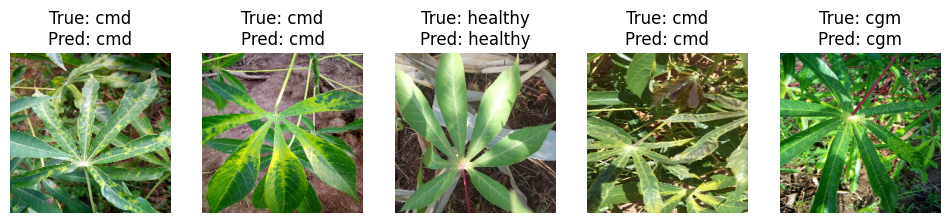

In [13]:
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    preds = tf.argmax(predictions, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}")
        plt.axis('off')
    plt.show()